In [1]:
import cellmech.beads_generator as beads_generator
import seaborn as sns
import matplotlib.pyplot as plt

# random_beads = beads_generator.create_random_bead(100, 20)
# ax = sns.heatmap(random_beads)
# plt.title("Cell boundary and force points")


Generating mock bead images...
Image generation complete.


<Axes: >

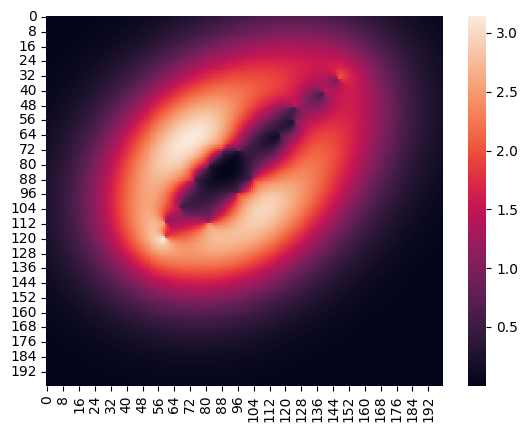

In [2]:
from cellmech.bead_detection import bead_image_correlation, generate_mock_beads_center, generate_mock_bead_image, generate_mock_displacement
import matplotlib.pyplot as plt
import numpy as np

# Constants
SUBSET_SIZE = 31  # Must be odd
GRID_SPACING = 5
grid_size = 200
num_beads = 100
IMAGE_SIZE = grid_size

# 1. Define Applied Displacement
APPLIED_DX = 2.5  # True displacement in X (columns)
APPLIED_DY = 1.8  # True displacement in Y (rows)

# 2. Generate Mock Images (Ref and Def)
print("Generating mock bead images...")
    
dUx, dUy = generate_mock_displacement(image_file = 'images/cell_boundary/img6.png', N = grid_size)
dUx = 1e4*dUx
dUy = 1e4*dUy
bead_centers = generate_mock_beads_center(num_beads=num_beads, max_range = grid_size)
reference_image = generate_mock_bead_image(IMAGE_SIZE, bead_centers, noise_level=0.02, dUx=np.zeros((IMAGE_SIZE, IMAGE_SIZE)), dUy=np.zeros((IMAGE_SIZE, IMAGE_SIZE)))
deformed_image = generate_mock_bead_image(IMAGE_SIZE, bead_centers, noise_level=0.02, dUx=dUx, dUy=dUy)
print("Image generation complete.")

# 3. Perform DIC
# try:
displacement_field_array = bead_image_correlation(
    reference_image, 
    deformed_image, grid_size
)
# Extract coordinates (Y, X) and displacements (U, V)
# Y, X = displacement_field_array[:, 0], displacement_field_array[:, 1]
U, V = displacement_field_array
sns.heatmap(dUx**2 + dUy**2)



/tmp/ipykernel_38039/3623897622.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


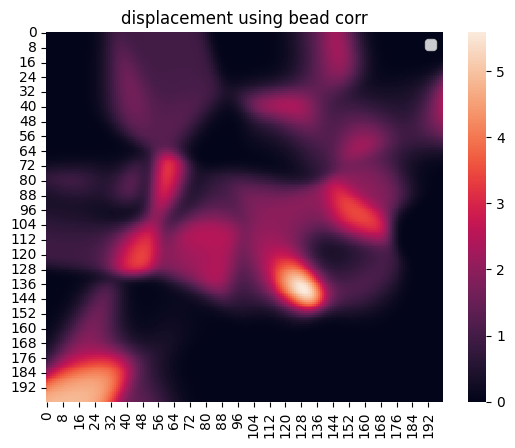

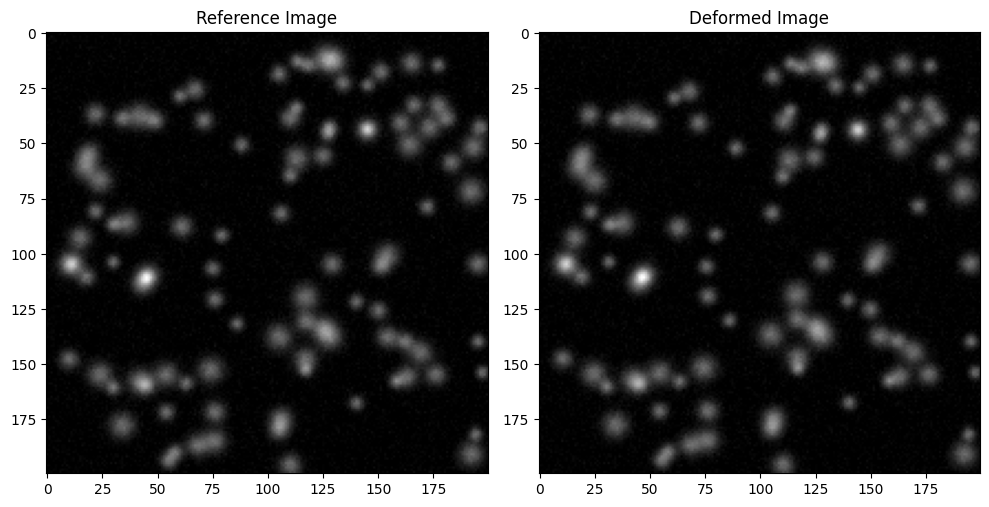

In [ ]:
sns.heatmap(U**2 + V**2)
plt.title("displacement using bead corr")
plt.legend()
plt.show()
    
# Plotting the raw images for context
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(reference_image, cmap='gray')
axes[0].set_title("Reference Image")
axes[1].imshow(deformed_image, cmap='gray')
axes[1].set_title("Deformed Image")
plt.tight_layout()
plt.show()